In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('nyc-taxi-fare-prediction-blank')
jovian.set_colab_id('1RQFI5fSIySpz_5Lvl1AICF1Jo5y5Q1Av')

     |████████████████████████████████| 68 kB 4.9 MB/s 


# New York City Taxi Fare Prediction

![](https://i.imgur.com/ecwUY8F.png)

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers. 

This dataset is taken from a [Kaggle competition](ttps://www.kaggle.com/c/new-york-city-taxi-fare-prediction) organized by Google Cloud. It contains over 55 millions rows of training data. We'll attempt to achieve a respectable score in the competition using just a fraction of the data. Along the way, we'll also look at some practical tips for machine learning. PMost of the ideas & techniques covered in this notebook are derived from other public notebooks & blog posts.

To run this notebook, select "Run" > "Run on Colab" and connect your Google Drive account with Jovian. Make sure to use the GPU runtime if you plan on using a GPU.

You can find the completed version of this notebook here: https://jovian.ai/aakashns/nyc-taxi-fare-prediction-filled





> _**TIP #1**: Create an outline for your notebook & for each section before you start coding_



Here's an outline of the project:

1. Download the dataset
2. Explore & analyze the dataset
3. Prepare the dataset for ML training
4. Train hardcoded & baseline models
5. Make predictions & submit to Kaggle
6. Peform feature engineering
7. Train & evaluate different models
8. Tune hyperparameters for the best models
9. Train on a GPU with the entire dataset
10. Document & publish the project online


## 1. Download the Dataset

Steps:

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas

### Install Required Libraries

In [ ]:
!pip install jovian opendatasets pandas numpy scikit-learn xgboost --quiet

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

### Download Data from Kaggle

We'll use the [opendatasets](https://github.com/JovianML/opendatasets) library to download the dataset. You'll need to upload your [Kaggle API key](https://github.com/JovianML/opendatasets/blob/master/README.md#kaggle-credentials) (a file called `kaggle.json`) to Colab.

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = "https://www.kaggle.com/c/new-york-city-taxi-fare-prediction"

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: shouryaanant
Your Kaggle Key: ··········


100%|██████████| 1.56G/1.56G [00:34<00:00, 48.4MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [ ]:
data_dir = "new-york-city-taxi-fare-prediction"

### View Dataset Files

Let's look at the size, no. of lines and first few lines of each file.

In [ ]:
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Nov 13 16:24 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Nov 13 16:24 sample_submission.csv
-rw-r--r-- 1 root root 960K Nov 13 16:24 test.csv
-rw-r--r-- 1 root root 5.4G Nov 13 16:25 train.csv


In [ ]:
!wc -l {data_dir}/train.csv

55423856 new-york-city-taxi-fare-prediction/train.csv


In [ ]:
!wc -l {data_dir}/test.csv

wc: {data-dir}/test.csv: No such file or directory


In [ ]:
!wc -l {data_dir}/sample_submission.csv

9915 new-york-city-taxi-fare-prediction/sample_submission.csv


In [ ]:
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [ ]:
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [ ]:
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


Observations:

- This is a supervised learning regression problem
- Training data is 5.5 GB in size
- Training data has 5.5 million rows
- Test set is much smaller (< 10,000 rows)
- The training set has 8 columns:
    - `key` (a unique identifier)
    - `fare_amount` (target column)
    - `pickup_datetime`
    - `pickup_longitude`
    - `pickup_latitude`
    - `dropoff_longitude`
    - `dropoff_latitude`
    - `passenger_count`
- The test set has all columns except the target column `fare_amount`.
- The submission file should contain the `key` and `fare_amount` for each test sample.



In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

### Loading Training Set

> _**TIP #2**: When working with large datasets, always start with a sample to experiment & iterate faster._

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

- Ignore the `key` column
- Parse pickup datetime while loading data 
- Specify data types for other columns
   - `float32` for geo coordinates
   - `float32` for fare amount
   - `uint8` for passenger count
- Work with a 1% sample of the data (~500k rows)

We can apply these optimizations while using [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [ ]:
import pandas as pd

In [ ]:
import random

In [ ]:
random.random()

0.010280398847270278

In [ ]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')

In [ ]:
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [ ]:
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude' : 'float32',
    'pickup_latitude' : 'float32',
    'dropoff_longitude' : 'float32',
    'dropoff_latitude' : 'float32',
    'passenger_count': 'uint8'
 }

In [ ]:
sample_frac = 0.01

In [ ]:
random.seed(42)
def skip_row(row_idx):
  if row_idx == 0:
    return False
  return random.random() > sample_frac

In [ ]:
df= pd.read_csv(data_dir+'/train.csv',
                usecols = selected_cols,
                parse_dates = ['pickup_datetime'],
                dtype = dtypes, 
                skiprows = skip_row)

In [ ]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1


> _**TIP #3**: Fix the seeds for random number generators so that you get the same results every time you run your notebook._

**Exercise**: Try loading 3%, 10%, 30% and 100% of the data.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

### Load Test Set

For the test set, we'll simply provide the data types.

In [ ]:
test_df = pd.read_csv(data_dir+'/test.csv',
                      dtype = dtypes, parse_dates=['pickup_datetime'])

In [ ]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

## 2. Explore the Dataset

- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization
- Ask & answer questions

### Training Set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float32            
 6   passenger_count    552450 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354463,-72.288383,39.830513,-72.295395,39.854305,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.226158,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [ ]:
df['pickup_datetime'].min(), df['pickup_datetime'].max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Observations about training data:

- 550k+ rows, as expected
- No missing data (in the sample)
- `fare_amount` ranges from \$-52.0 to \$499.0 
- `passenger_count` ranges from 0 to 208 
- There seem to be some errors in the latitude & longitude values
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~19 MB of space in the RAM

We may need to deal with outliers and data entry errors before we train our model.


### Test Set

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [ ]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.976181,40.750954,-73.974945,40.751553,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [ ]:
test_df['pickup_datetime'].min(), test_df['pickup_datetime'].max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers (we can limit training data to this range)
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

### Exploratory Data Analysis and Visualization

**Exercise**: Create graphs (histograms, line charts, bar charts, scatter plots, box plots, geo maps etc.) to study the distrubtion of values in each column, and the relationship of each input column to the target.



### Ask & Answer Questions

**Exercise**: Ask & answer questions about the dataset: 

1. What is the busiest day of the week?
2. What is the busiest time of the day?
3. In which month are fares the highest?
4. Which pickup locations have the highest fares?
5. Which drop locations have the highest fares?
6. What is the average ride distance?
7. ???

Performing EDA on your dataset and asking questions will help you develop a deeper understand of the data and give you ideas for feature engineering.



Resources for exploratory analysis & visualization:

- EDA project from scratch: https://www.youtube.com/watch?v=kLDTbavcmd0
- Data Analysis with Python: https://zerotopandas.com

> _**TIP #4**: Take an iterative approach to building ML models: do some EDA, do some feature engineering, train a model, then repeat to improve your model._

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data. 

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

> _**TIP #5**: Your validation set should be as similar to the test set or real-world data as possible i.e. the evaluation metric score of a model on validation & test sets should be very close, otherwise you're shooting in the dark._


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state = 42)

In [ ]:
len(train_df), len(val_df)

(441960, 110490)

### Fill/Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)>

In [ ]:
train_df = train_df.dropna()
val_df = val_df.dropna()

### Extract Inputs and Outputs

In [ ]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
input_cols = {'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count'}

In [ ]:
target_col = 'fare_amount'

#### Training

In [ ]:
train_inputs = train_df[input_cols]

In [ ]:
train_targets = train_df[target_col]

In [ ]:
train_inputs

,dropoff_longitude,dropoff_latitude,passenger_count,pickup_latitude,pickup_longitude
353352,-73.977974,40.742352,4,40.741543,-73.993652
360070,-73.993805,40.724579,1,40.724579,-73.993805
372609,-73.969116,40.761230,1,40.780750,-73.959160
550895,-73.978645,40.772602,1,40.783951,-73.952187
444151,-73.991104,40.750404,2,40.746834,-73.977112
...,...,...,...,...,...
110268,-73.979073,40.763168,1,40.750633,-73.987152
259178,-74.013176,40.707840,2,40.764042,-73.972656
365838,-73.989845,40.720551,3,40.749767,-73.991982
131932,-73.990814,40.751328,1,40.761398,-73.969055


In [ ]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

#### Validation

In [ ]:
val_inputs = val_df[input_cols]

In [ ]:
val_targets = val_df[target_col]

In [ ]:
val_inputs

,dropoff_longitude,dropoff_latitude,passenger_count,pickup_latitude,pickup_longitude
15971,-73.973679,40.739086,1,40.759190,-73.995834
149839,-73.976143,40.751205,1,40.738335,-73.977386
515867,-73.787170,40.646645,1,40.749470,-73.983910
90307,-73.972252,40.690182,1,40.643463,-73.790794
287032,-73.991463,40.750309,2,40.761944,-73.976593
...,...,...,...,...,...
467556,-73.983406,40.750019,3,40.761238,-73.968567
19482,-73.985855,40.731171,1,40.755920,-73.986725
186063,0.000000,0.000000,1,0.000000,0.000000
382260,-73.872589,40.774300,1,40.760334,-73.980057


In [ ]:
val_targets

15971     14.000000
149839     6.500000
515867    49.570000
90307     49.700001
287032     8.500000
            ...    
467556     6.100000
19482      7.300000
186063     4.500000
382260    32.900002
18838     11.500000
Name: fare_amount, Length: 110490, dtype: float32

#### Test

In [ ]:
test_inputs = test_df[input_cols]

In [ ]:
test_inputs

,dropoff_longitude,dropoff_latitude,passenger_count,pickup_latitude,pickup_longitude
0,-73.981430,40.743835,1,40.763805,-73.973320
1,-73.998886,40.739201,1,40.719383,-73.986862
2,-73.979652,40.746140,1,40.751259,-73.982521
3,-73.990448,40.751637,1,40.767807,-73.981163
4,-73.988564,40.744427,1,40.789776,-73.966049
...,...,...,...,...,...
9909,-73.955643,40.780388,6,40.796997,-73.968124
9910,-73.960213,40.776371,6,40.803600,-73.945511
9911,-73.789742,40.647011,6,40.726608,-73.991600
9912,-73.939178,40.801731,6,40.735432,-73.985573


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

## 4. Train Hardcoded & Baseline Models

> _**TIP #6**: Always create a simple hardcoded or baseline model to establish the minimum score any proper ML model should beat._

- Hardcoded model: always predict average fare
- Baseline model: Linear regression 

For evaluation the dataset uses RMSE error: 
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

### Train & Evaluate Hardcoded Model

Let's create a simple model that always predicts the average.

In [ ]:
import numpy as np

In [ ]:


class MeanRegressor:
  def fit(self, inputs, targets):
    self.mean = targets.mean()
  def predict(self, inputs):
    return np.full(inputs.shape[0], self.mean)

In [ ]:
np.full(10,3)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
mean_model = MeanRegressor()

In [ ]:
mean_model.fit(train_inputs, train_targets)

In [ ]:
mean_model.mean

11.354591369628906

In [ ]:
train_preds = mean_model.predict(train_inputs)

In [ ]:
train_preds

array([11.35459137, 11.35459137, 11.35459137, ..., 11.35459137,
       11.35459137, 11.35459137])

In [ ]:
val_preds = mean_model.predict(val_inputs)

In [ ]:
val_preds

array([11.35459137, 11.35459137, 11.35459137, ..., 11.35459137,
       11.35459137, 11.35459137])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(targets, preds):
  return mean_squared_error(targets, preds, squared = False)

In [ ]:
train_rmse = rmse(train_targets, train_preds)
train_rmse

9.78978199423857

In [ ]:
val_rmse = rmse(val_targets, val_preds)
val_rmse

9.899954151552434

Our dumb hard-coded model is off by \$9.899 on average, which is pretty bad considering the average fare is \$11.35.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

### Train & Evaluate Baseline Model

We'll train a linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model= LinearRegression()

In [ ]:
linear_model.fit(train_inputs, train_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
train_preds = linear_model.predict(train_inputs)

In [ ]:
train_preds

array([11.546236, 11.284609, 11.284139, ..., 11.458917, 11.28428 ,
       11.284447], dtype=float32)

In [ ]:
rmse(train_targets, train_preds)

9.788632

In [ ]:
val_preds = linear_model.predict(val_inputs)

In [ ]:
rmse(val_targets, val_preds)

9.898088

The linear regression model is off by $9.898, which isn't much better than simply predicting the average. 

This is mainly because the training data (geocoordinates) is not in a format that's useful for the model, and we're not using one of the most important columns: pickup date & time.

However, now we have a baseline that our other models should ideally beat.

## 5. Make Predictions and Submit to Kaggle

> _**TIP #7**: When working on a Kaggle competition, submit early and submit often (ideally daily). The best way to improve your models is to try & beat your previous score._

- Make predictions for test set
- Generate submissions CSV
- Submit to Kaggle
- Record in experiment tracking sheet

In [ ]:
test_inputs

,dropoff_longitude,dropoff_latitude,passenger_count,pickup_latitude,pickup_longitude
0,-73.981430,40.743835,1,40.763805,-73.973320
1,-73.998886,40.739201,1,40.719383,-73.986862
2,-73.979652,40.746140,1,40.751259,-73.982521
3,-73.990448,40.751637,1,40.767807,-73.981163
4,-73.988564,40.744427,1,40.789776,-73.966049
...,...,...,...,...,...
9909,-73.955643,40.780388,6,40.796997,-73.968124
9910,-73.960213,40.776371,6,40.803600,-73.945511
9911,-73.789742,40.647011,6,40.726608,-73.991600
9912,-73.939178,40.801731,6,40.735432,-73.985573


In [ ]:
test_preds = linear_model.predict(test_inputs)

In [ ]:
sub_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [ ]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [ ]:
sub_df['fare_amount'] = test_preds

In [ ]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.284279
1,2015-01-27 13:08:24.0000003,11.284633
2,2011-10-08 11:53:44.0000002,11.284384
3,2012-12-01 21:12:12.0000002,11.284222
4,2012-12-01 21:12:12.0000003,11.284049
...,...,...
9909,2015-05-10 12:37:51.0000002,11.720277
9910,2015-01-12 17:05:51.0000001,11.720224
9911,2015-04-19 20:44:15.0000001,11.721248
9912,2015-01-31 01:05:19.0000005,11.720798


In [ ]:
sub_df.to_csv('linear_model_submission.csv', index = None)

> _**TIP #8**: Create reusable functions for common tasks. They'll help you iterate faster and free up your mind to think about new ideas._

In [ ]:
def predict_and_submit(model, fname, test_inputs):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [ ]:
predict_and_submit(linear_model,'linear_sub2.csv',test_inputs)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.284279
1,2015-01-27 13:08:24.0000003,11.284633
2,2011-10-08 11:53:44.0000002,11.284384
3,2012-12-01 21:12:12.0000002,11.284222
4,2012-12-01 21:12:12.0000003,11.284049
...,...,...
9909,2015-05-10 12:37:51.0000002,11.720277
9910,2015-01-12 17:05:51.0000001,11.720224
9911,2015-04-19 20:44:15.0000001,11.721248
9912,2015-01-31 01:05:19.0000005,11.720798


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

> _**TIP #9**: Track your ideas & experiments systematically to avoid become overwhelmed with dozens of models. Use this template: https://bit.ly/mltrackingsheet_

## 6. Feature Engineering

> _**TIP #10**: Take an iterative approach to feature engineering. Add some features, train a model, evaluate it, keep the features if they help, otherwise drop them, then repeat._

- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop
- Add distance from landmarks

Exercise: We're going to apply all of the above together, but you should observer the effect of adding each feature individually.

### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour



In [ ]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [ ]:
add_dateparts(train_df, 'pickup_datetime')

In [ ]:
add_dateparts(val_df,'pickup_datetime')

In [ ]:
add_dateparts(test_df,'pickup_datetime')

In [ ]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18


In [ ]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
15971,14.000000,2015-05-19 09:27:24+00:00,-73.995834,40.759190,-73.973679,40.739086,1,2015,5,19,1,9
149839,6.500000,2010-04-10 15:07:51+00:00,-73.977386,40.738335,-73.976143,40.751205,1,2010,4,10,5,15
515867,49.570000,2009-07-25 14:11:00+00:00,-73.983910,40.749470,-73.787170,40.646645,1,2009,7,25,5,14
90307,49.700001,2011-11-11 19:09:21+00:00,-73.790794,40.643463,-73.972252,40.690182,1,2011,11,11,4,19
287032,8.500000,2015-03-09 18:06:44+00:00,-73.976593,40.761944,-73.991463,40.750309,2,2015,3,9,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...
467556,6.100000,2010-04-03 20:16:00+00:00,-73.968567,40.761238,-73.983406,40.750019,3,2010,4,3,5,20
19482,7.300000,2010-04-26 00:32:00+00:00,-73.986725,40.755920,-73.985855,40.731171,1,2010,4,26,0,0
186063,4.500000,2009-05-21 08:13:16+00:00,0.000000,0.000000,0.000000,0.000000,1,2009,5,21,3,8
382260,32.900002,2011-07-07 16:10:59+00:00,-73.980057,40.760334,-73.872589,40.774300,1,2011,7,7,3,16


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

### Add Distance Between Pickup and Drop

We can use the haversine distance: 
- https://en.wikipedia.org/wiki/Haversine_formula
- https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [ ]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km


In [ ]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [ ]:
add_trip_distance(train_df)

In [ ]:
add_trip_distance(val_df)

In [ ]:
add_trip_distance(test_df)

In [ ]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.323411
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.325504
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.558912
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.243267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.549976
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.116529
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.251601
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.146101


### Add Distance From Popular Landmarks

> _**TIP #11**: Creative feature engineering (generally involving human insight or external data) is a lot more effective than excessive hyperparameter tuning. Just one or two good feature improve the model's performance drastically._

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location. 

In [ ]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [ ]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])


In [ ]:
def add_landmarks(df):
  landmarks = [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]
  for name, lonlat in landmarks:
    add_landmark_dropoff_distance(df, name, lonlat)

In [ ]:
add_landmarks(train_df)

In [ ]:
add_landmarks(val_df)

In [ ]:
add_landmarks(test_df)

### Remove Outliers and Invalid Data

There seems to be some invalid data in each of the following columns:

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

We'll use the following ranges:

- `fare_amount`: \$1 to \$500
- `longitudes`: -75 to -72
- `latitudes`: 40 to 42
- `passenger_count`: 1 to 6


In [ ]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [ ]:
train_df = remove_outliers(train_df)

In [ ]:
val_df = remove_outliers(val_df)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

### Scaling and One-Hot Encoding

**Exercise**: Try scaling numeric columns to the `(0,1)` range and encoding categorical columns using a one-hot encoder.

We won't do this because we'll be training tree-based models which are generally able to do a good job even without the above.

### Save Intermediate DataFrames

> _**TIP #12**: Save preprocessed & prepared data files to save time & experiment faster. You may also want to create differnt notebooks for EDA, feature engineering and model training._

Let's save the processed datasets in the Apache Parquet format, so that we can load them back easily to resume our work from this point.




In [ ]:
train_df.to_parquet('train.parquet')

In [ ]:
val_df.to_parquet('val.parquet')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 7. Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Linear Regression
- Random Forests
- Gradient Boosting

Exercise: Train Ridge, SVM, KNN, Decision Tree models

### Split Inputs & Targets

In [ ]:
train_df.columns


Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [ ]:
input_cols = {'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'}

In [ ]:
target_col = 'fare_amount'

In [ ]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [ ]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [ ]:
test_inputs = test_df[input_cols]

Let's define a helper function to evaluate models.

In [ ]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

### Ridge Regression

See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model1= Ridge(random_state=42)

In [ ]:
model1.fit(train_inputs,train_targets)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=42, solver='auto', tol=0.001)

In [ ]:
evaluate(model1)

(5.0493123388943655,
 5.217862291919714,
 array([ 8.12925029,  4.11573642,  8.75065953, ..., 10.47228798,
         8.23062833, 10.58669824]),
 array([10.91952557,  6.20495203, 46.2178443 , ...,  8.04625928,
        25.56906207,  8.45341202]))

Our model was able to get to an RMSE of $5.2, much better than our baseline model.

In [ ]:
predict_and_submit(model1,'ridge_submission.csv',test_inputs)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.081893
1,2015-01-27 13:08:24.0000003,11.399199
2,2011-10-08 11:53:44.0000002,5.356675
3,2012-12-01 21:12:12.0000002,8.763307
4,2012-12-01 21:12:12.0000003,14.609644
...,...,...
9909,2015-05-10 12:37:51.0000002,9.024829
9910,2015-01-12 17:05:51.0000001,11.218400
9911,2015-04-19 20:44:15.0000001,47.926353
9912,2015-01-31 01:05:19.0000005,22.599973


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

### Random Forest

See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model2 = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=10,n_estimators=100)

In [ ]:
%%time
model2.fit(train_inputs,train_targets)

CPU times: user 9min 35s, sys: 943 ms, total: 9min 36s
Wall time: 4min 54s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
evaluate(model2)

(3.595000188695307,
 4.161193549447305,
 array([ 6.99399909,  9.10190057,  9.09379987, ..., 10.43084183,
         7.782156  , 10.400694  ]),
 array([12.65433613,  6.14604627, 47.31069124, ...,  8.36589355,
        29.27069612,  8.24300662]))

In [ ]:
predict_and_submit(model2,'rf_submission.csv',test_inputs)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.479748
1,2015-01-27 13:08:24.0000003,10.468653
2,2011-10-08 11:53:44.0000002,5.046076
3,2012-12-01 21:12:12.0000002,8.481902
4,2012-12-01 21:12:12.0000003,14.300694
...,...,...
9909,2015-05-10 12:37:51.0000002,8.694722
9910,2015-01-12 17:05:51.0000001,12.535128
9911,2015-04-19 20:44:15.0000001,55.355344
9912,2015-01-31 01:05:19.0000005,21.467722



This puts us at position ~570 out of 1483 i.e. top 40%, which is already a really good score. 

Remember that we're only using 1% of the data, and we haven't done much hyperparameter tuning yet.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

### Gradient Boosting

See https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model3= XGBRegressor(max_depth=5,objective='reg:squarederror', n_estimators=200,n_jobs=-1,random_state=42)

In [ ]:
model3.fit(train_inputs,train_targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
evaluate(model3)

(3.3928702,
 3.9848773,
 array([ 6.561274,  8.086757,  9.857218, ..., 11.214461,  8.771544,
        10.726094], dtype=float32),
 array([13.79448  ,  6.397214 , 48.320103 , ...,  7.7298474, 30.52668  ,
         8.782154 ], dtype=float32))

In [ ]:
predict_and_submit(model3,'xgb_submission.csv',test_inputs)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.061548
1,2015-01-27 13:08:24.0000003,11.038297
2,2011-10-08 11:53:44.0000002,5.014495
3,2012-12-01 21:12:12.0000002,8.595421
4,2012-12-01 21:12:12.0000003,15.554040
...,...,...
9909,2015-05-10 12:37:51.0000002,8.838337
9910,2015-01-12 17:05:51.0000001,11.809698
9911,2015-04-19 20:44:15.0000001,54.355553
9912,2015-01-31 01:05:19.0000005,19.370010




This submission isn't as good as the random forest, but there's scope for improvement with Hyperparameter tuning.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

## 8. Tune Hyperparmeters

https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76


We'll train parameters for the XGBoost model. Here’s a strategy for tuning hyperparameters:

- Tune the most important/impactful hyperparameter first e.g. n_estimators

- With the best value of the first hyperparameter, tune the next most impactful hyperparameter

- And so on, keep training the next most impactful parameters with the best values for previous parameters...

- Then, go back to the top and further tune each parameter again for further marginal gains

- Hyperparameter tuning is more art than science, unfortunately. Try to get a feel for how the parameters interact with each other based on your understanding of the parameter…

Let's define a helper function for trying different hyperparameters.

In [ ]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [ ]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror',
    'learning_rate':0.05
}

### No. of Trees

CPU times: user 3min 53s, sys: 626 ms, total: 3min 54s
Wall time: 2min 3s


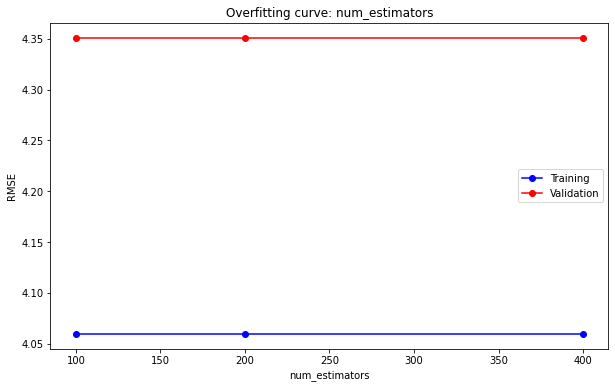

In [ ]:
%%time
test_param_and_plot(XGBRegressor,'num_estimators',[100,200,400],**best_params)

Seems like 500 estimators has the lowest validation loss. However, it also takes a long time. Let's stick with 250 for now.

In [ ]:
best_params['num_estimators'] = 100

### Max Depth

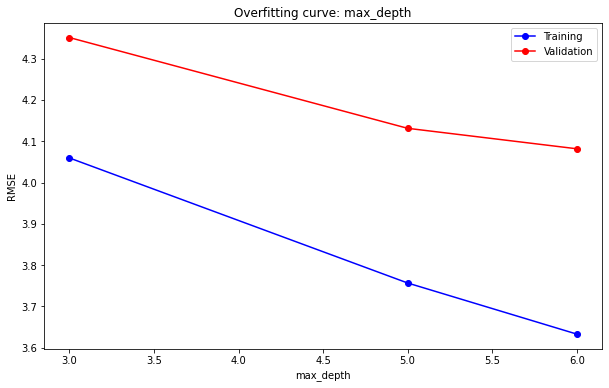

In [ ]:
test_param_and_plot(XGBRegressor,'max_depth',[3,5,6],**best_params)

Looks like a max depth of 5 is ideal.

In [ ]:
best_params['max_depth'] = 7

### Learning Rate

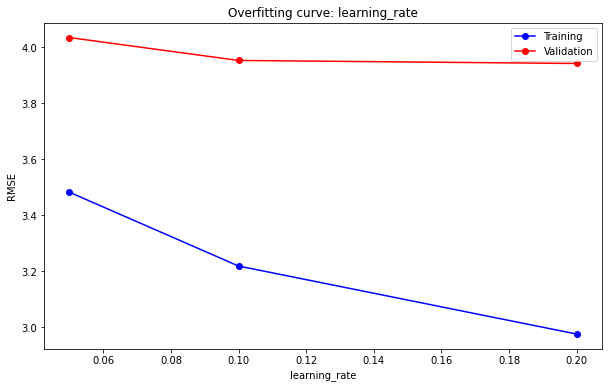

In [ ]:
test_param_and_plot(XGBRegressor,'learning_rate',[0.05, 0.1, 0.2],**best_params)

Seems like the best learning rate is 0.25.

In [ ]:
best_params['learning_rate'] = ???

### Other Parameters

Similarly we can experiment with other parameters. 

Here's a set of parameters that works well:

In [ ]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', 
                               n_jobs=-1, 
                               random_state=42,
                               n_estimators=100, 
                               max_depth=7, 
                               learning_rate=0.1, 
                               subsample=0.7, 
                               colsample_bytree=0.7)

In [ ]:
xgb_model_final.fit(train_inputs,train_targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)

In [ ]:
evaluate(xgb_model_final)

(3.2788022,
 3.9688454,
 array([ 6.5219636,  8.3491745, 10.211965 , ..., 11.099339 ,  8.927949 ,
        10.271104 ], dtype=float32),
 array([13.890049,  6.13463 , 47.04478 , ...,  8.075495, 30.542156,
         8.672507], dtype=float32))

In [ ]:
predict_and_submit(xgb_model_final,'xgb_tuned_submission.csv',test_inputs)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.898756
1,2015-01-27 13:08:24.0000003,10.542968
2,2011-10-08 11:53:44.0000002,4.857060
3,2012-12-01 21:12:12.0000002,8.675963
4,2012-12-01 21:12:12.0000003,15.746529
...,...,...
9909,2015-05-10 12:37:51.0000002,8.606747
9910,2015-01-12 17:05:51.0000001,12.360170
9911,2015-04-19 20:44:15.0000001,54.394745
9912,2015-01-31 01:05:19.0000005,20.280617




This puts us at the ~460th position out of 1483 i.e. top 30%. This is pretty amazing considering:

- We are using just 1% of the training data
- We are only using a single model (most top submissions use ensembles)
- Our best model takes just 10 minutes to train (as oppposed to hours/days)
- We haven't fully optimized the hyperparameters yet

Let's save the weights of this model. Follow this guide: https://scikit-learn.org/stable/modules/model_persistence.html

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank


'https://jovian.ai/shourya-anant/nyc-taxi-fare-prediction-blank'

In [ ]:
jovian.commit()

**Exercises**: 

1. Tune hyperparameters for Linear Regression & random forests.
2. Repeat with 3%, 10%, 30% and 100% of the training set. How much reduction in error does 100x more data produce?
3. Ensemble (average) the results from multiple models and observe if they're better than individual models.

### Save Model Weights to Google Drive (Optional)

We can save all the output files we've created to Google Drive, so that we can reuse them later if required.

Follow these guides: 
- https://scikit-learn.org/stable/modules/model_persistence.html
- https://colab.research.google.com/notebooks/io.ipynb

## 9. Train on GPU with entire dataset (Optional)

Steps:
- Install `dask`, `cudf` and `cuml`
- Load the dataset to GPU
- Create training and validation set
- Perform feature engineering
- Train XGBoost `cuml` model
- Make predictions & submit

Follow these guides and fill out the empty cells below:
- https://towardsdatascience.com/nyc-taxi-fare-prediction-605159aa9c24
- https://jovian.ai/allenkong221/nyc-taxi-fare-rapids-dask-gpu/v/1?utm_source=embed#C10
- https://developer.nvidia.com/blog/accelerating-xgboost-on-gpu-clusters-with-dask/
- https://rapids.ai/xgboost.html

### Install `dask`, `cudf` and `cuml`

### Load the data

### Create training & validation set

### Perform feature engineering

### Train XGBoost model on GPU

### Make Predictions & Submit

## 10. Document & Publish Your Work

> _**TIP #13**: Always document & publish your projects online. They help improve your understanding, showcase your skills & often lead to inbound job opportunities._

- Add explanations using Markdown
- Clean up the code & create functions
- Publish notebook to Jovian
- Write a blog post and embed

Follow this guide: https://www.youtube.com/watch?v=NK6UYg3-Bxs 

## References

* Dataset: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview
* Missing semester (Shell scripting): https://missing.csail.mit.edu/
* Opendatsets library: https://github.com/JovianML/opendatasets 
* EDA project from scratch: https://www.youtube.com/watch?v=kLDTbavcmd0
* GeoPy: https://geopy.readthedocs.io/en/stable/#module-geopy.distance 
* Blog post by Allen Kong: https://towardsdatascience.com/nyc-taxi-fare-prediction-605159aa9c24 
* Machine Learning with Python: Zero to GBMs - https://zerotogbms.com 
* Experiment tracking spreadsheet: https://bit.ly/mltrackingsheet 
* Pandas datetime components: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components 
* Haversine distance: https://en.wikipedia.org/wiki/Haversine_formula 
* Haversine distance with Numpy: https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas 
* RAPIDS (parent project for cudf and cuml): https://rapids.ai/
* Data Science blog post from scratch: https://www.youtube.com/watch?v=NK6UYg3-Bxs 
* Examples of Machine Learning Projects:
    * Walmart Store Sales: https://jovian.ai/anushree-k/final-walmart-simple-rf-gbm
    * Used Car Price Prediction: https://jovian.ai/kara-mounir/used-cars-prices 
    * Lithology Prediction: https://jovian.ai/ramysaleem/ml-project-machine-predicting-lithologies
    * Ad Demand Prediction: https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-prj 
    * Financial distress prediction: https://jovian.ai/sm-wilson/ml-project-financial-distress-prediction
    * Credit scoring: https://jovian.ai/shenghongzhong/credit-scores-algorithms-ml-2



In [ ]:
jovian.commit()